In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
pd.to_numeric(df.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [9]:
df.shape

(7043, 20)

In [10]:
df1= df[df.TotalCharges!=' ']

In [11]:
df1.shape

(7032, 20)

In [12]:
df1.TotalCharges= pd.to_numeric(df1.TotalCharges)

/var/folders/8z/5hrcm2_s3gbc_m2tqx33mw900000gp/T/ipykernel_72342/3157282470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges= pd.to_numeric(df1.TotalCharges)


In [13]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [14]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

In [15]:
tenure_churn_no

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

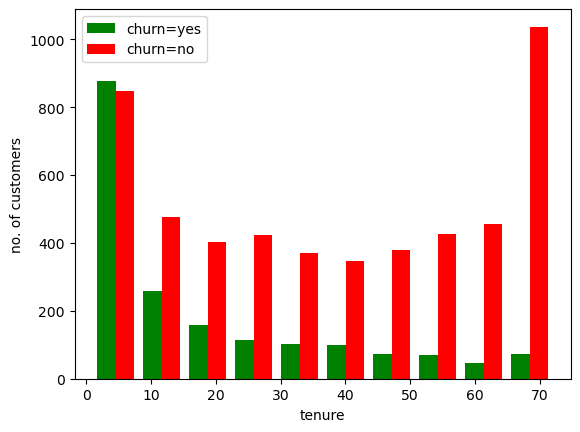

In [16]:
#plt.xlable("")
plt.xlabel("tenure")
plt.ylabel("no. of customers")
plt.hist([tenure_churn_yes,tenure_churn_no], color=['green','red'],label=['churn=yes','churn=no'])
plt.legend()

In [17]:
def unique_col_value(df):
    for columns in df:
        if df[columns].dtype=='object':
            print(f'{columns}:{df[columns].unique()}')

In [18]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)

/var/folders/8z/5hrcm2_s3gbc_m2tqx33mw900000gp/T/ipykernel_72342/3221983738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)
/var/folders/8z/5hrcm2_s3gbc_m2tqx33mw900000gp/T/ipykernel_72342/3221983738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [19]:
#unique_col_value(df1)
for columns in df1:
    if df1[columns].dtype=='object':
        print(f'{columns}:{df1[columns].unique()}')   

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [20]:
for columns in df1:
    df1[columns].replace('Yes',1, inplace=True)
    df1[columns].replace('No',0, inplace=True)

/var/folders/8z/5hrcm2_s3gbc_m2tqx33mw900000gp/T/ipykernel_72342/2207576985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[columns].replace('Yes',1, inplace=True)
/var/folders/8z/5hrcm2_s3gbc_m2tqx33mw900000gp/T/ipykernel_72342/2207576985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[columns].replace('No',0, inplace=True)


In [21]:
for columns in df1:
        print(f'{columns}:{df1[columns].unique()}')   

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 0]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [22]:
df1['gender'].replace('Female',1, inplace=True)
df1['gender'].replace('Male',0, inplace=True)

/var/folders/8z/5hrcm2_s3gbc_m2tqx33mw900000gp/T/ipykernel_72342/4197264837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace('Female',1, inplace=True)
/var/folders/8z/5hrcm2_s3gbc_m2tqx33mw900000gp/T/ipykernel_72342/4197264837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace('Male',0, inplace=True)


In [23]:
df1['gender'].unique()

array([1, 0])

In [24]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

In [25]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [26]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6354,1,0,1,0,61,1,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4932,0,0,1,1,27,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
2422,0,1,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
498,1,1,0,0,5,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [27]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
col=['tenure','MonthlyCharges','TotalCharges']
df2[col]=scale.fit_transform(df2[col])

In [28]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6585,1,0,1,1,0.591549,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
885,0,0,0,0,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
6241,0,0,0,0,0.028169,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
6910,0,0,0,1,0.971831,1,1,1,1,1,...,0,0,1,0,0,1,0,0,1,0


In [29]:
for columns in df2:
    print(f'{columns}:{df2[columns]}')

gender:0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: gender, Length: 7032, dtype: int64
SeniorCitizen:0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7032, dtype: int64
Partner:0       1
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    1
7042    0
Name: Partner, Length: 7032, dtype: int64
Dependents:0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    0
Name: Dependents, Length: 7032, dtype: int64
tenure:0       0.000000
1       0.464789
2       0.014085
3       0.619718
4       0.014085
          ...   
7038    0.323944
7039    1.000000
7040    0.140845
7041    0.042254
7042    0.915493
Name: tenure, Length: 7032, dtype: float64
PhoneService:0       0
1       1
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    0
7041

In [30]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [31]:
#model forming
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [32]:
x_train.shape

(5625, 26)

In [33]:
y_train.shape

(5625,)

In [34]:
model= keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(12,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(x_train,y_train, epochs=1000)

Epoch 1/1000
176/176 [==============================] - 0s 348us/step - loss: 0.4916 - accuracy: 0.7582
Epoch 2/1000
176/176 [==============================] - 0s 332us/step - loss: 0.4349 - accuracy: 0.7899
Epoch 3/1000
176/176 [==============================] - 0s 360us/step - loss: 0.4215 - accuracy: 0.8011
Epoch 4/1000
176/176 [==============================] - 0s 316us/step - loss: 0.4171 - accuracy: 0.8027
Epoch 5/1000
176/176 [==============================] - 0s 330us/step - loss: 0.4154 - accuracy: 0.8046
Epoch 6/1000
176/176 [==============================] - 0s 329us/step - loss: 0.4110 - accuracy: 0.8073
Epoch 7/1000
176/176 [==============================] - 0s 327us/step - loss: 0.4079 - accuracy: 0.8064
Epoch 8/1000
176/176 [==============================] - 0s 321us/step - loss: 0.4068 - accuracy: 0.8076
Epoch 9/1000
176/176 [==============================] - 0s 325us/step - loss: 0.4051 - accuracy: 0.8084
Epoch 10/1000
176/176 [==============================] - 0s 319u

176/176 [==============================] - 0s 324us/step - loss: 0.3488 - accuracy: 0.8366
Epoch 80/1000
176/176 [==============================] - 0s 321us/step - loss: 0.3448 - accuracy: 0.8340
Epoch 81/1000
176/176 [==============================] - 0s 321us/step - loss: 0.3442 - accuracy: 0.8359
Epoch 82/1000
176/176 [==============================] - 0s 305us/step - loss: 0.3436 - accuracy: 0.8366
Epoch 83/1000
176/176 [==============================] - 0s 305us/step - loss: 0.3418 - accuracy: 0.8352
Epoch 84/1000
176/176 [==============================] - 0s 309us/step - loss: 0.3417 - accuracy: 0.8393
Epoch 85/1000
176/176 [==============================] - 0s 308us/step - loss: 0.3410 - accuracy: 0.8395
Epoch 86/1000
176/176 [==============================] - 0s 308us/step - loss: 0.3427 - accuracy: 0.8420
Epoch 87/1000
176/176 [==============================] - 0s 308us/step - loss: 0.3400 - accuracy: 0.8366
Epoch 88/1000
176/176 [==============================] - 0s 308us/ste

176/176 [==============================] - 0s 316us/step - loss: 0.3046 - accuracy: 0.8603
Epoch 157/1000
176/176 [==============================] - 0s 319us/step - loss: 0.3075 - accuracy: 0.8585
Epoch 158/1000
176/176 [==============================] - 0s 314us/step - loss: 0.3069 - accuracy: 0.8619
Epoch 159/1000
176/176 [==============================] - 0s 308us/step - loss: 0.3100 - accuracy: 0.8601
Epoch 160/1000
176/176 [==============================] - 0s 307us/step - loss: 0.3065 - accuracy: 0.8572
Epoch 161/1000
176/176 [==============================] - 0s 307us/step - loss: 0.3042 - accuracy: 0.8610
Epoch 162/1000
176/176 [==============================] - 0s 326us/step - loss: 0.3042 - accuracy: 0.8571
Epoch 163/1000
176/176 [==============================] - 0s 326us/step - loss: 0.3061 - accuracy: 0.8620
Epoch 164/1000
176/176 [==============================] - 0s 315us/step - loss: 0.3065 - accuracy: 0.8576
Epoch 165/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 317us/step - loss: 0.2875 - accuracy: 0.8665
Epoch 234/1000
176/176 [==============================] - 0s 316us/step - loss: 0.2866 - accuracy: 0.8708
Epoch 235/1000
176/176 [==============================] - 0s 308us/step - loss: 0.2891 - accuracy: 0.8658
Epoch 236/1000
176/176 [==============================] - 0s 307us/step - loss: 0.2837 - accuracy: 0.8688
Epoch 237/1000
176/176 [==============================] - 0s 309us/step - loss: 0.2888 - accuracy: 0.8674
Epoch 238/1000
176/176 [==============================] - 0s 310us/step - loss: 0.2880 - accuracy: 0.8672
Epoch 239/1000
176/176 [==============================] - 0s 312us/step - loss: 0.2869 - accuracy: 0.8702
Epoch 240/1000
176/176 [==============================] - 0s 311us/step - loss: 0.2838 - accuracy: 0.8672
Epoch 241/1000
176/176 [==============================] - 0s 314us/step - loss: 0.2864 - accuracy: 0.8670
Epoch 242/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 328us/step - loss: 0.2708 - accuracy: 0.8770
Epoch 311/1000
176/176 [==============================] - 0s 321us/step - loss: 0.2768 - accuracy: 0.8748
Epoch 312/1000
176/176 [==============================] - 0s 321us/step - loss: 0.2748 - accuracy: 0.8732
Epoch 313/1000
176/176 [==============================] - 0s 313us/step - loss: 0.2721 - accuracy: 0.8748
Epoch 314/1000
176/176 [==============================] - 0s 315us/step - loss: 0.2737 - accuracy: 0.8741
Epoch 315/1000
176/176 [==============================] - 0s 317us/step - loss: 0.2701 - accuracy: 0.8768
Epoch 316/1000
176/176 [==============================] - 0s 318us/step - loss: 0.2687 - accuracy: 0.8788
Epoch 317/1000
176/176 [==============================] - 0s 317us/step - loss: 0.2686 - accuracy: 0.8807
Epoch 318/1000
176/176 [==============================] - 0s 320us/step - loss: 0.2707 - accuracy: 0.8731
Epoch 319/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 338us/step - loss: 0.2595 - accuracy: 0.8814
Epoch 388/1000
176/176 [==============================] - 0s 354us/step - loss: 0.2589 - accuracy: 0.8814
Epoch 389/1000
176/176 [==============================] - 0s 317us/step - loss: 0.2598 - accuracy: 0.8839
Epoch 390/1000
176/176 [==============================] - 0s 311us/step - loss: 0.2607 - accuracy: 0.8818
Epoch 391/1000
176/176 [==============================] - 0s 308us/step - loss: 0.2626 - accuracy: 0.8780
Epoch 392/1000
176/176 [==============================] - 0s 308us/step - loss: 0.2586 - accuracy: 0.8811
Epoch 393/1000
176/176 [==============================] - 0s 325us/step - loss: 0.2664 - accuracy: 0.8802
Epoch 394/1000
176/176 [==============================] - 0s 323us/step - loss: 0.2575 - accuracy: 0.8823
Epoch 395/1000
176/176 [==============================] - 0s 324us/step - loss: 0.2589 - accuracy: 0.8805
Epoch 396/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 315us/step - loss: 0.2509 - accuracy: 0.8825
Epoch 465/1000
176/176 [==============================] - 0s 308us/step - loss: 0.2533 - accuracy: 0.8866
Epoch 466/1000
176/176 [==============================] - 0s 313us/step - loss: 0.2524 - accuracy: 0.8868
Epoch 467/1000
176/176 [==============================] - 0s 309us/step - loss: 0.2476 - accuracy: 0.8873
Epoch 468/1000
176/176 [==============================] - 0s 313us/step - loss: 0.2565 - accuracy: 0.8825
Epoch 469/1000
176/176 [==============================] - 0s 307us/step - loss: 0.2528 - accuracy: 0.8859
Epoch 470/1000
176/176 [==============================] - 0s 307us/step - loss: 0.2578 - accuracy: 0.8812
Epoch 471/1000
176/176 [==============================] - 0s 308us/step - loss: 0.2511 - accuracy: 0.8841
Epoch 472/1000
176/176 [==============================] - 0s 307us/step - loss: 0.2544 - accuracy: 0.8850
Epoch 473/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 318us/step - loss: 0.2490 - accuracy: 0.8853
Epoch 542/1000
176/176 [==============================] - 0s 319us/step - loss: 0.2429 - accuracy: 0.8896
Epoch 543/1000
176/176 [==============================] - 0s 314us/step - loss: 0.2503 - accuracy: 0.8821
Epoch 544/1000
176/176 [==============================] - 0s 338us/step - loss: 0.2466 - accuracy: 0.8855
Epoch 545/1000
176/176 [==============================] - 0s 308us/step - loss: 0.2469 - accuracy: 0.8880
Epoch 546/1000
176/176 [==============================] - 0s 309us/step - loss: 0.2483 - accuracy: 0.8864
Epoch 547/1000
176/176 [==============================] - 0s 309us/step - loss: 0.2521 - accuracy: 0.8821
Epoch 548/1000
176/176 [==============================] - 0s 309us/step - loss: 0.2537 - accuracy: 0.8841
Epoch 549/1000
176/176 [==============================] - 0s 310us/step - loss: 0.2496 - accuracy: 0.8866
Epoch 550/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 313us/step - loss: 0.2405 - accuracy: 0.8912
Epoch 619/1000
176/176 [==============================] - 0s 318us/step - loss: 0.2404 - accuracy: 0.8889
Epoch 620/1000
176/176 [==============================] - 0s 317us/step - loss: 0.2448 - accuracy: 0.8864
Epoch 621/1000
176/176 [==============================] - 0s 313us/step - loss: 0.2454 - accuracy: 0.8876
Epoch 622/1000
176/176 [==============================] - 0s 315us/step - loss: 0.2440 - accuracy: 0.8889
Epoch 623/1000
176/176 [==============================] - 0s 314us/step - loss: 0.2366 - accuracy: 0.8916
Epoch 624/1000
176/176 [==============================] - 0s 312us/step - loss: 0.2475 - accuracy: 0.8889
Epoch 625/1000
176/176 [==============================] - 0s 316us/step - loss: 0.2401 - accuracy: 0.8900
Epoch 626/1000
176/176 [==============================] - 0s 318us/step - loss: 0.2454 - accuracy: 0.8839
Epoch 627/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 315us/step - loss: 0.2396 - accuracy: 0.8930
Epoch 696/1000
176/176 [==============================] - 0s 317us/step - loss: 0.2322 - accuracy: 0.8921
Epoch 697/1000
176/176 [==============================] - 0s 310us/step - loss: 0.2431 - accuracy: 0.8875
Epoch 698/1000
176/176 [==============================] - 0s 312us/step - loss: 0.2390 - accuracy: 0.8942
Epoch 699/1000
176/176 [==============================] - 0s 313us/step - loss: 0.2476 - accuracy: 0.8864
Epoch 700/1000
176/176 [==============================] - 0s 310us/step - loss: 0.2504 - accuracy: 0.8841
Epoch 701/1000
176/176 [==============================] - 0s 309us/step - loss: 0.2435 - accuracy: 0.8880
Epoch 702/1000
176/176 [==============================] - 0s 308us/step - loss: 0.2390 - accuracy: 0.8923
Epoch 703/1000
176/176 [==============================] - 0s 308us/step - loss: 0.2336 - accuracy: 0.8951
Epoch 704/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 328us/step - loss: 0.2334 - accuracy: 0.8896
Epoch 773/1000
176/176 [==============================] - 0s 325us/step - loss: 0.2396 - accuracy: 0.8889
Epoch 774/1000
176/176 [==============================] - 0s 349us/step - loss: 0.2346 - accuracy: 0.8903
Epoch 775/1000
176/176 [==============================] - 0s 344us/step - loss: 0.2347 - accuracy: 0.8924
Epoch 776/1000
176/176 [==============================] - 0s 347us/step - loss: 0.2364 - accuracy: 0.8923
Epoch 777/1000
176/176 [==============================] - 0s 354us/step - loss: 0.2337 - accuracy: 0.8932
Epoch 778/1000
176/176 [==============================] - 0s 355us/step - loss: 0.2519 - accuracy: 0.8827
Epoch 779/1000
176/176 [==============================] - 0s 348us/step - loss: 0.2328 - accuracy: 0.8923
Epoch 780/1000
176/176 [==============================] - 0s 367us/step - loss: 0.2372 - accuracy: 0.8916
Epoch 781/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 315us/step - loss: 0.2268 - accuracy: 0.8987
Epoch 850/1000
176/176 [==============================] - 0s 315us/step - loss: 0.2351 - accuracy: 0.8924
Epoch 851/1000
176/176 [==============================] - 0s 309us/step - loss: 0.2300 - accuracy: 0.8928
Epoch 852/1000
176/176 [==============================] - 0s 300us/step - loss: 0.2325 - accuracy: 0.8935
Epoch 853/1000
176/176 [==============================] - 0s 297us/step - loss: 0.2313 - accuracy: 0.8898
Epoch 854/1000
176/176 [==============================] - 0s 291us/step - loss: 0.2292 - accuracy: 0.8937
Epoch 855/1000
176/176 [==============================] - 0s 295us/step - loss: 0.2312 - accuracy: 0.8942
Epoch 856/1000
176/176 [==============================] - 0s 302us/step - loss: 0.2287 - accuracy: 0.8939
Epoch 857/1000
176/176 [==============================] - 0s 306us/step - loss: 0.2330 - accuracy: 0.8910
Epoch 858/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 327us/step - loss: 0.2235 - accuracy: 0.8962
Epoch 927/1000
176/176 [==============================] - 0s 324us/step - loss: 0.2368 - accuracy: 0.8892
Epoch 928/1000
176/176 [==============================] - 0s 325us/step - loss: 0.2295 - accuracy: 0.8891
Epoch 929/1000
176/176 [==============================] - 0s 329us/step - loss: 0.2276 - accuracy: 0.8958
Epoch 930/1000
176/176 [==============================] - 0s 328us/step - loss: 0.2200 - accuracy: 0.8992
Epoch 931/1000
176/176 [==============================] - 0s 322us/step - loss: 0.2198 - accuracy: 0.8965
Epoch 932/1000
176/176 [==============================] - 0s 322us/step - loss: 0.2287 - accuracy: 0.8948
Epoch 933/1000
176/176 [==============================] - 0s 325us/step - loss: 0.2412 - accuracy: 0.8930
Epoch 934/1000
176/176 [==============================] - 0s 322us/step - loss: 0.2349 - accuracy: 0.8880
Epoch 935/1000
176/176 [==============================] - 0s 

In [35]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 316us/step - loss: 1.5189 - accuracy: 0.7491


[1.5188891887664795, 0.7491115927696228]

In [36]:
yp=model.predict(x_test)

44/44 [==============================] - 0s 255us/step


In [37]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [38]:
ypp=[]
for element in yp:
    if(element>0.5):
        ypp.append(1)
    else:
        ypp.append(0)

In [39]:
ypp

[1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,


In [40]:
y_test

2660    0
744     0
5579    1
64      1
3287    1
       ..
2024    0
4396    1
4081    1
1297    0
4899    1
Name: Churn, Length: 1407, dtype: int64